# Customer analysis in marketing campaigns

In this exercise, you work for a consulting firm as data scientist. In this scenario, your client is the marketing team of a grocery store. They would like to find <strong>which are the ideal customers</strong> according to the results of the last marketing campaigns. Your analysis will be helpful to adapt and modify products according to the different needs and behavior of their customers.

You dispose of a dataset from the mall dataset with several features:


People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if customer complained in the last 2 years, 0 otherwise 

Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

- NumWebPurchases: Number of purchases made through the company’s web site
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s web site in the last month

'Z_CostContact' and 'Z_Revenue' contains constant value across all the observations and therefore they will not contribute anything in the analysis.

You have two days to do this study

# Import des librairies 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.impute import MissingIndicator 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# Data cleaning

In [2]:
campaign_df = pd.read_csv('marketing_campaign.txt', sep="\t")
campaign_df.duplicated().sum()

0

In [3]:
df = campaign_df.drop(['Z_CostContact','Z_Revenue'],axis=1)

In [4]:
df['Year_Birth'].describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

In [5]:
df.drop(df.index[df['Year_Birth'] <= 1920], inplace=True)

In [6]:
df = df.dropna()

In [7]:
df.duplicated().sum()

0

In [8]:
df['ID'].nunique()

2213

# EDA

## Product

In [9]:
df_product= df[['Marital_Status','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]

<AxesSubplot:xlabel='MntWines', ylabel='Marital_Status'>

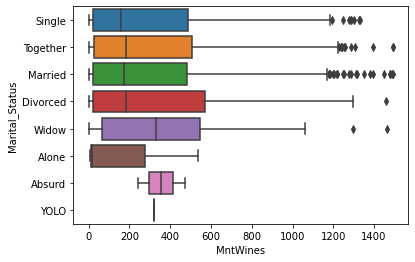

In [10]:
sns.pie(x=df_product['MntWines'], y=df_product['Marital_Status'])

In [11]:
df['Marital_Status'].value_counts()

Married     857
Together    572
Single      470
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [12]:
df.drop(df.index[df['Marital_Status'] == 'YOLO'], inplace = True)

In [13]:
df.drop(df.index[df['Marital_Status'] == 'Absurd'], inplace = True)

In [14]:
df.drop(df.index[df['Marital_Status'] == 'Alone'], inplace = True)

In [15]:
df['Marital_Status'].value_counts()

Married     857
Together    572
Single      470
Divorced    231
Widow        76
Name: Marital_Status, dtype: int64

In [16]:
df.shape

(2206, 27)

# Customer Segmentation

# RFM Score

In [17]:
df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15
...,...,...,...,...,...,...
2235,709,43,182,42,118,247
2236,406,0,30,0,0,8
2237,908,48,217,32,12,24
2238,428,30,214,80,30,61


In [18]:
montant= df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
df['montant']= montant

In [21]:
frequence = df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']+df['NumWebVisitsMonth']+df['NumDealsPurchases']
df['frequence'] = frequence

In [22]:
df_rfm = df[['ID','Recency','frequence','montant']]
df_rfm

,ID,Recency,frequence,montant
0,5524,58,32,1617
1,2174,38,11,27
2,4141,26,25,776
3,6182,26,14,53
4,5324,94,24,422
...,...,...,...,...
2235,10870,46,23,1341
2236,4001,56,29,444
2237,7270,91,25,1241
2238,8235,8,26,843


In [23]:
df_rfm.describe()

,ID,Recency,frequence,montant
count,2206.000000,2206.000000,2206.000000,2206.000000
mean,5590.160925,49.071170,20.205349,607.133273
std,3244.322900,28.941679,7.282133,602.942728
min,0.000000,0.000000,0.000000,5.000000
25%,2826.750000,24.000000,14.000000,69.000000
50%,5458.500000,49.000000,19.000000,396.000000
75%,8425.250000,74.000000,25.000000,1047.750000
max,11191.000000,99.000000,46.000000,2525.000000


In [24]:
###Calculating quantile values
quintiles = df_rfm[['Recency', 'frequence', 'montant']].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9]).to_dict()
###Benchmark to give score for recency indicator
def r_score(r):
    if r <= quintiles['Recency'][.3]:
        return 1
    elif r <= quintiles['Recency'][.6]:
        return 2
    else:
        return 3

def f_score(f):
    if f <= quintiles['frequence'][.3]:
        return 3
    elif f <= quintiles['frequence'][.6]:
        return 2
    else:
        return 1
def m_score(m):
    if m <= df_rfm['montant'][350]:
        return 3
    elif m > df_rfm['montant'][350] and m <= df_rfm['montant'][1048]:
        return 2
    else:
        return 1

In [25]:
df_rfm['R_score'] = df_rfm.Recency.apply(lambda x: r_score(x))
df_rfm['F_score'] = df_rfm.frequence.apply(lambda x: f_score(x))
df_rfm['M_score'] = df_rfm.montant.apply(lambda x: m_score(x))

<ipython-input-25-5064fd246259>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['R_score'] = df_rfm.Recency.apply(lambda x: r_score(x))
<ipython-input-25-5064fd246259>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['F_score'] = df_rfm.frequence.apply(lambda x: f_score(x))
<ipython-input-25-5064fd246259>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [26]:
df_rfm['RFM_Score'] = df_rfm['R_score'].map(str) + df_rfm['F_score'].map(str) + df_rfm['M_score'].map(str)
df_rfm.head()

<ipython-input-26-a56d4d74d6af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['RFM_Score'] = df_rfm['R_score'].map(str) + df_rfm['F_score'].map(str) + df_rfm['M_score'].map(str)


,ID,Recency,frequence,montant,R_score,F_score,M_score,RFM_Score
0,5524,58,32,1617,2,1,1,211
1,2174,38,11,27,2,3,3,233
2,4141,26,25,776,1,1,3,113
3,6182,26,14,53,1,3,3,133
4,5324,94,24,422,3,1,3,313


In [27]:
def categ(x):
    if x in["111"]:
        return "champion"
    elif x in["113"]:
         return "Loyal Customers" #Buy on a regular basis. Responsive to promotions.
    elif x in['121','123']:
        return "Potential Loyalist"#Recent customers with average frequency
    elif x in['131']:
         return "Recent Customers"#Bought most recently, but not often.
    elif x in['133']:
         return "Promising"#Recent shoppers, but haven’t spent much
    elif x in['211','213']:
        return "Customers Needing Attention"#Above average recency, frequency and monetary values. May not have bought very recently though.
    elif x in['223','221','231','233']:
         return "About To Sleep" #Below average recency and frequency. Will lose them if not reactivated.
    elif x in['311','313']:
        return "At Risk"#Purchased often but a long time ago
    elif x in["321",'323']:
         return "Can’t Lose Them"#Used to purchase frequently but haven’t returned for a long time.
    else:
         return "Hibernating"#Last purchase was long back and low number of orders. May be lost.

In [28]:
df_rfm['RFM_Score'].value_counts()

333    265
133    223
233    219
311    201
323    158
211    148
111    144
313    143
123    129
223    127
113    112
213     97
321     95
121     71
221     57
331      9
231      5
131      3
Name: RFM_Score, dtype: int64

In [29]:
df_rfm['Status'] = df_rfm['RFM_Score'].apply(lambda x: categ(x))

<ipython-input-29-43ef2888f37a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['Status'] = df_rfm['RFM_Score'].apply(lambda x: categ(x))


In [30]:
df_rfm['Status'].value_counts()

About To Sleep                 408
At Risk                        344
Hibernating                    274
Can’t Lose Them                253
Customers Needing Attention    245
Promising                      223
Potential Loyalist             200
champion                       144
Loyal Customers                112
Recent Customers                 3
Name: Status, dtype: int64

In [31]:
df = df.drop(['montant','frequence','Recency'],axis=1)

In [32]:
df_powerBi = df.merge(df_rfm, left_on='ID',right_on = 'ID',how ='left')

In [36]:
df_powerBi.to_csv('df_powerBi.csv', index=False)

[Text(0.5, 0, 'Status des Clients'),
 Text(0, 0.5, 'Montant total'),
 Text(0.5, 1.0, 'Montant dépensé selon le  status des clients')]

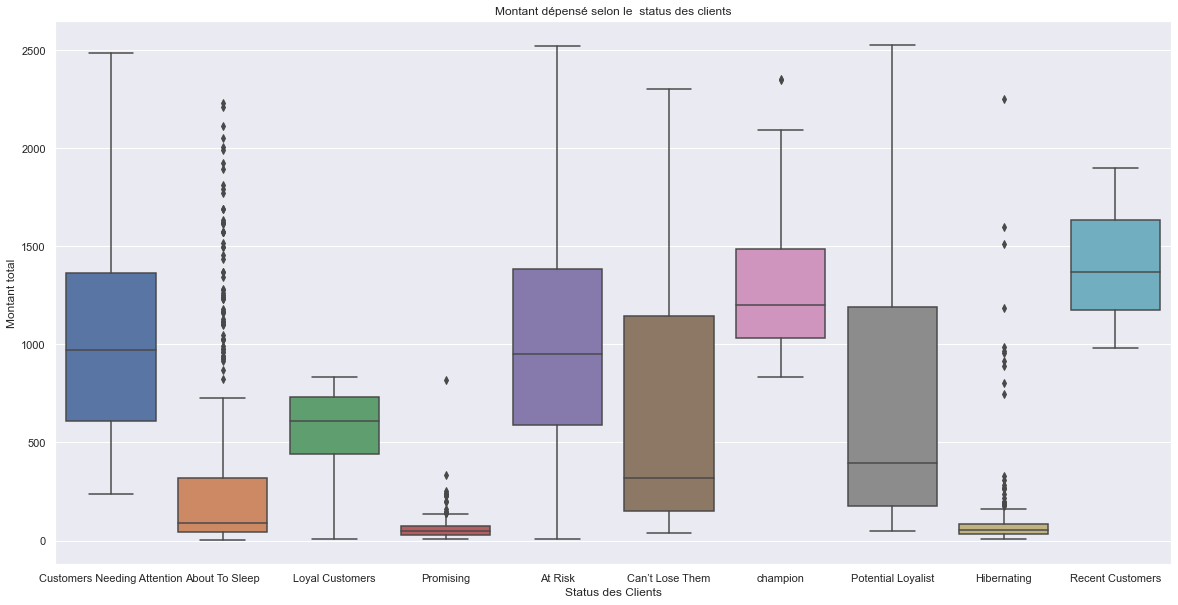

In [49]:
sns.set(rc={'figure.figsize':(20,10)})
ax3 = sns.boxplot(x = df_powerBi['Status'], y = df_powerBi['montant'])
ax3.set(xlabel='Status des Clients', ylabel='Montant total', title='Montant dépensé selon le  status des clients')

In [59]:
champion_df = df_powerBi[df_powerBi['Status'] == "champion"]
champion_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,...,Complain,Response,Recency,frequence,montant,R_score,F_score,M_score,RFM_Score,Status
14,2114,1946,PhD,Single,82800.0,0,0,24-11-2012,1006,22,...,0,1,23,29,1315,1,1,1,111,champion
32,8755,1946,Master,Married,68657.0,0,0,20-02-2013,482,34,...,0,0,4,25,1196,1,1,1,111,champion
38,8601,1980,Graduation,Married,80011.0,0,1,29-04-2013,421,76,...,0,0,3,25,1395,1,1,1,111,champion
47,4114,1964,Master,Married,79143.0,0,0,11-08-2012,650,37,...,0,0,2,32,1693,1,1,1,111,champion
57,1012,1952,Graduation,Single,61823.0,0,1,18-02-2013,523,7,...,0,0,26,31,884,1,1,1,111,champion


# Conlusions

With the RFM method we find the best of your customer.
You will find them in the champion_df dataframe. 


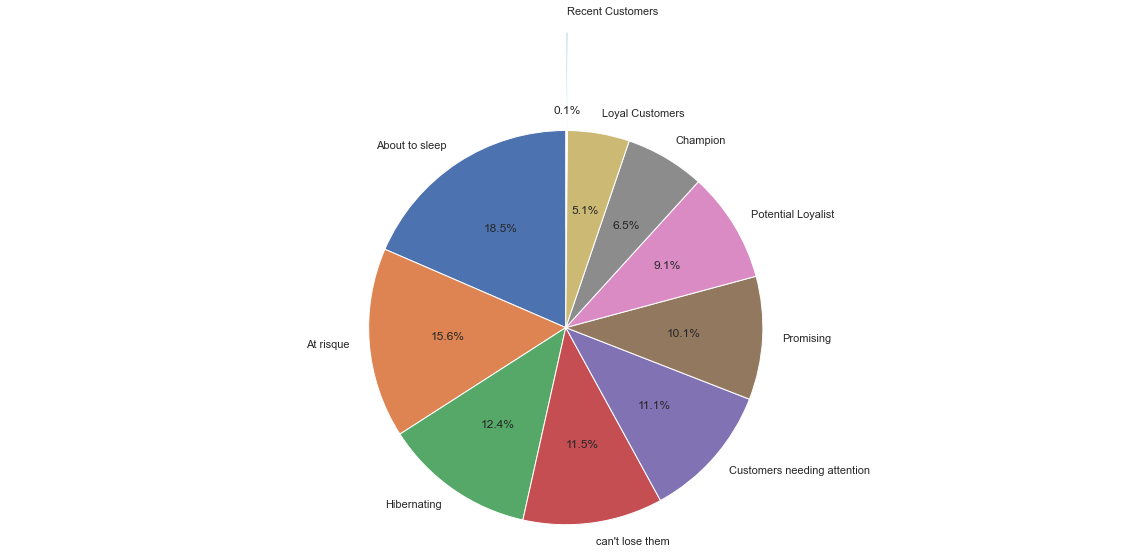

In [60]:
labels = ['About to sleep','At risque','Hibernating',"can't lose them",'Customers needing attention','Promising','Potential Loyalist','Champion','Loyal Customers','Recent Customers']
sizes = df_powerBi['Status'].value_counts()
explode = (0, 0, 0, 0, 0,0, 0, 0, 0, 0.5)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()